In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from sklearn.ensemble import VotingClassifier
import joblib

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head(2)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive


In [4]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

### The steps that we are going to work on while processing textual data are given below:
- Remove punctuation
- Replace short words
- Making text lower case
- Remove stopwords
- Lemmatization

#### Remove Puntuaction

In [5]:
# Remove Puntuaction
df['review_processed'] = df['review'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-5-acf686e08dfe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['review'].str.replace("[^a-zA-Z#]", " ")


In [6]:
# Re ordering columns
df = df[['review','review_processed','sentiment']]

#### Remove Short Words

In [7]:
# Replacing short words
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

#### Make text Lower

In [8]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

#### Remove stopwords

In [9]:
stop_words_counter = Counter(stopwords.words('english'))

In [10]:
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([word for word in word_tokenize(x) 
                                                                          if stop_words_counter[word]==0]))

In [11]:
df.head(2)

,review,review_processed,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",one reviewers mentioned watching episode hooked right exactly happened first thing struck brutality unflinching scenes violence set right word trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance mess around first episode ever saw struck nasty surreal say ready watched developed taste got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching may become comfortable uncomfortable viewing thats get touch darker side,positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes 

#### Lemmitization

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
#Change nlltk pos tag to word net pos tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [14]:
def lemmatize_sent(sent):
    lemmatized_sentence = []
    # Tag the words using NLTK POS Tagger
    words = word_tokenize(sent)
    tagged_words = nltk.pos_tag(words)
    
    # Convert the NLTK Tagged data to word net tag data
    tagged_words_wordnet = [(word, nltk_tag_to_wordnet_tag(tag)) for word, tag in tagged_words]
    
    #Create a list of lemmatized words
    for word, tag in tagged_words_wordnet:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return ' '.join(lemmatized_sentence) 

In [15]:
df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sent(x))

In [16]:
df.head(2)

,review,review_processed,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",one reviewer mention watch episode hook right exactly happen first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance mess around first episode ever saw struck nasty surreal say ready watch developed taste get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watching may become comfortable uncomfortable view thats get touch darker side,positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",wonderful little production film technique unassuming old time bbc fashion give comfort sometimes discomforting sense realism entire piece actor extremely well

### Building the Word Cloud

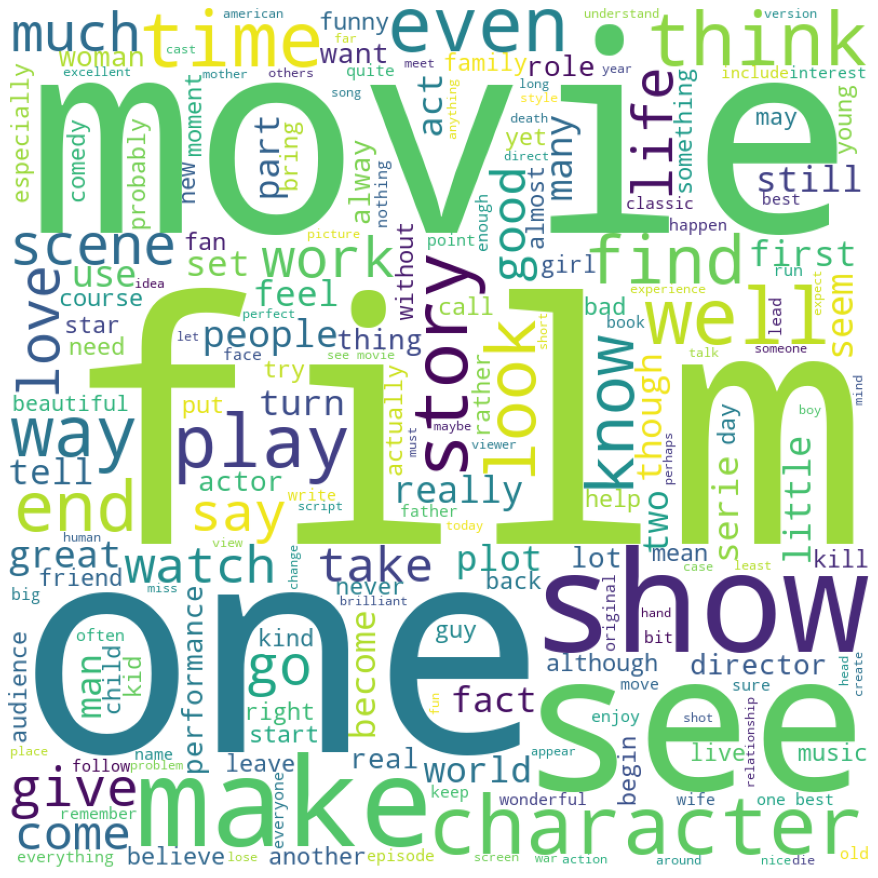

In [17]:
#prepare the text
word_cloud_df = df[df['sentiment'] == 'positive']
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 
#generate word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10)
wordcloud = wordcloud.generate(all_words)


#plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Modelling Part

#### Splitting the data to train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.review_processed, df.sentiment, test_size=0.25, random_state=100)

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(37500, 12500, 37500, 12500)

#### Creating the bag of words model

In [20]:
vectorizer = CountVectorizer(max_features = 3000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#### Creating the Naive Bayes Model

In [30]:
# Creating 3 Naive Bayes models and testing them

multinomialNB = MultinomialNB()
bernoulliNB = BernoulliNB()
gaussianNB = GaussianNB()

#Fit the 3 models
multinomialNB.fit(X_train, y_train)
bernoulliNB.fit(X_train, y_train)
gaussianNB.fit(X_train.toarray(), y_train)

GaussianNB()

#### Checking the accuracy

In [31]:
# Predict for test set
y_test_pred_multi = multinomialNB.predict(X_test)
y_test_pred_ber = bernoulliNB.predict(X_test)
y_test_pred_gaus = gaussianNB.predict(X_test.toarray())

# Check accuracy
print(accuracy_score(y_test, y_test_pred_multi))
print(accuracy_score(y_test, y_test_pred_ber))
print(accuracy_score(y_test, y_test_pred_gaus))

0.848
0.85536
0.75136


### Make Pickle file

In [32]:
# Pickle file for Vectoriser
joblib.dump(vectorizer,"vectorizer.pkl")

['vectorizer.pkl']

In [33]:
#Pickle file for Model
joblib.dump(bernoulliNB,"model.pkl")

['model.pkl']

### Ensemble model

In [23]:
multinomialNB = MultinomialNB()
bernoulliNB = BernoulliNB()
gaussianNB = GaussianNB()

In [24]:
ensemble_classifier = VotingClassifier(
    estimators=[('Multi', multinomialNB), ('Ber', bernoulliNB), ('Gauss', gaussianNB)],
    voting='hard', n_jobs=-1)
ensemble_classifier = ensemble_classifier.fit(X_train.toarray(), y_train)

In [25]:
# check accuracy
print(accuracy_score(y_test, ensemble_classifier.predict(X_test.toarray())))

0.84936


#### Ensemble not giving good results

In [36]:
y_test[:5]

4253     negative
30076    negative
48047    negative
1666     positive
30740    positive
Name: sentiment, dtype: object

In [37]:
X_test[:5]

<5x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 517 stored elements in Compressed Sparse Row format>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.review_processed, df.sentiment, test_size=0.25, random_state=100)

In [39]:
X_test[:5]

4253                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [40]:
y_test[:5]

4253     negative
30076    negative
48047    negative
1666     positive
30740    positive
Name: sentiment, dtype: object

In [47]:
df.iloc[30740, :]

review              First, an explanation: Despite my headline, I'm giving this film only 8 stars because overall this is NOT one of the best films ever made. All the criticisms registered here have valid points. Also, be warned that to enjoy the script you really need to appreciate Neil Simon's brilliance with finding the wit within real human banter. He does have a distinctively New York ear for dialogue -- especially dry, Jewish, love-suffused sarcasm -- and if you have trouble accepting sarcasm as an expression of love, then you might have trouble accepting the optimism at the heart of this movie.<br /><br />So much for warnings. Here's my main point: Walter Matthau is flat-out perfect, even beyond perfect, in this movie. I have never seen him funnier, or more touching for that matter -- because at the same time that he shows us the hilariousness of this character who refuses to give up his Big Star self-image or insufferable attitudes even as his coherence is in decline, he also s

In [42]:
y_test.value_counts()

positive    6301
negative    6199
Name: sentiment, dtype: int64

In [45]:
y_test_pred_ber[:5]

array(['positive', 'negative', 'negative', 'positive', 'positive'],
      dtype='<U8')